In [ ]:
#pip install nibabel

   ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.3 MB 325.1 kB/s eta 0:00:11
    --------------------------------------- 0.1/3.3 MB 573.4 kB/s eta 0:00:06
   -- ------------------------------------- 0.2/3.3 MB 1.3 MB/s eta 0:00:03
   ---- ----------------------------------- 0.4/3.3 MB 1.7 MB/s eta 0:00:02
   ----------- ---------------------------- 0.9/3.3 MB 3.5 MB/s eta 0:00:01
   ----------------------------- ---------- 2.5/3.3 MB 7.5 MB/s eta 0:00:01
   ------------------------------------- -- 3.1/3.3 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 3.3/3.3 MB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

In [2]:
path_to_data = '../3702_left_knee.nii/3702_left_knee.nii'

In [3]:
ct_images_vol = nib.load(path_to_data)

In [4]:
#type of object
type(ct_images_vol)

nibabel.nifti1.Nifti1Image

In [5]:
print(ct_images_vol.header)
#dim             : [  3 512 512 216   1   1   1   1]
#dim[0] = 3: This is a 3D image volume.
#dim[1:4] = 512, 512, 216: Shape is (512, 512, 216) → Width × Height × Depth (Z-slices).
# Remaining values (1s) are placeholders for higher dimensions like time (not used here).

#pixdim          : [1.       0.869141 0.869141 2.       0.       0.       0.       0.      ]
# physical size of each voxel (in mm):
#### pixdim[1] = 0.869 mm → voxel width (X)
#### pixdim[2] = 0.869 mm → voxel height (Y)
#### pixdim[3] = 2.000 mm → voxel depth (Z)

#datatype        : int32 ; bitpix          : 32
# Voxel values are stored as 32-bit signed integers (int32). This matters when doing calculations or rescaling intensities.



<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512 216   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int32
bitpix          : 32
slice_start     : 0
pixdim          : [1.       0.869141 0.869141 2.       0.       0.       0.       0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 222.5
qoffset_y       : 222.5
qoffset_z       : -900.5
s

## Summary

Shape: (512, 512, 216) → 216 axial CT slices of 512×512 pixels

Voxel size: (0.869 × 0.869 × 2.0 mm³)

Datatype: 32-bit integer

Physical size of volume (approx.):

Width: 512 × 0.869 mm ≈ 445 mm

Height: 512 × 0.869 mm ≈ 445 mm

Depth: 216 × 2.0 mm = 432 mm



In [6]:
# Use nibabel to verify orientation
from nibabel.orientations import aff2axcodes

affine = ct_images_vol.affine
orientation = aff2axcodes(affine)
print("Orientation:", orientation)

# if Z corresponds to slice direction → you're in axial view.


Orientation: ('L', 'P', 'S')


In [7]:
ct_images_vol_data = ct_images_vol.get_fdata()
print(type(ct_images_vol_data)) # get_fdata() returned numpy.mmap which accesses files from disk instead of loading to ram
ct_images_vol_data = np.array(ct_images_vol_data) # load fully into ram for faster processing
print(type(ct_images_vol_data))


<class 'numpy.memmap'>
<class 'numpy.ndarray'>


In [8]:
print(f"shape of data: {ct_images_vol_data.shape}")

shape of data: (512, 512, 216)


# Visualize Slices

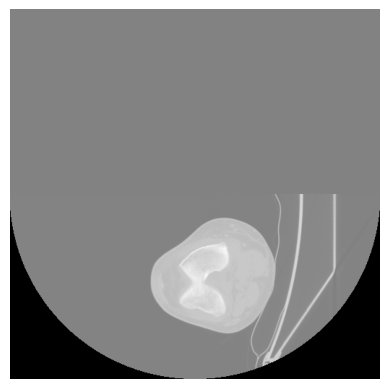

In [9]:
plt.imshow(ct_images_vol_data[:, :, 108], cmap="gray") #grab images along axial plane
plt.axis('off')
plt.show()

In [50]:
from ipywidgets import interact, fixed

def view_slice(z, vol_data):
    plt.imshow(vol_data[:, :, z], cmap='gray')
    plt.axis('off')
    plt.title(f"Axial Slice {z}")
    plt.show()

interact(view_slice, z=(0, ct_images_vol_data.shape[2] - 1), vol_data = fixed(ct_images_vol_data))

interactive(children=(IntSlider(value=107, description='z', max=215), Output()), _dom_classes=('widget-interac…

<function __main__.view_slice(z, vol_data)>

In [11]:
import napari
viewer = napari.view_image(ct_images_vol_data, name='Knee CT', colormap='gray')
napari.run()


c:\Users\DELL\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


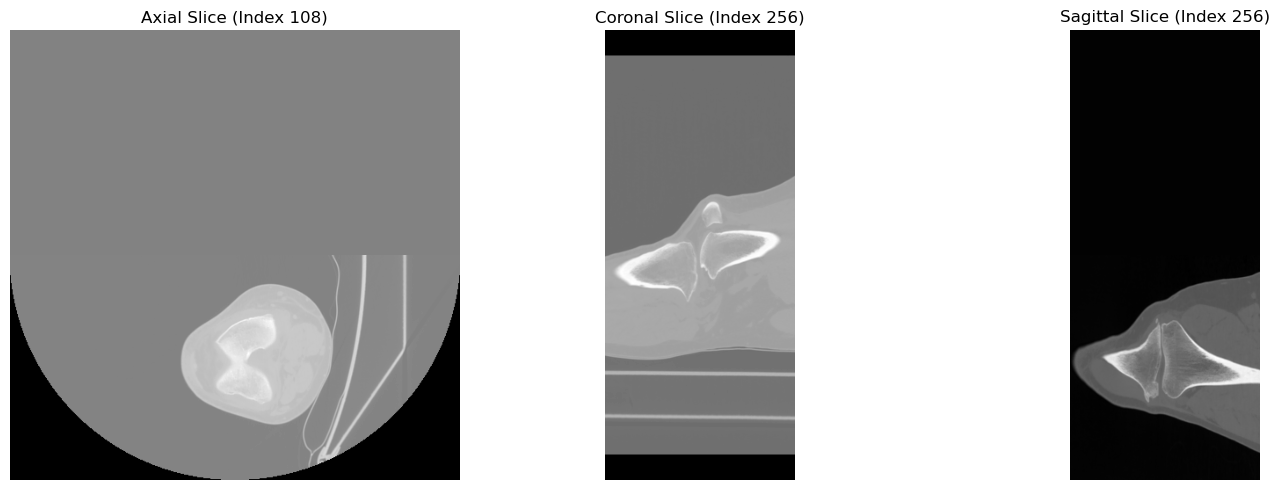

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Axial slice 
axes[0].imshow(ct_images_vol_data[:, :, 108], cmap='gray')
axes[0].set_title('Axial Slice (Index 108)')
axes[0].axis('off')

# Coronal slice
axes[1].imshow(ct_images_vol_data[375, :, :], cmap='gray')
axes[1].set_title('Coronal Slice (Index 256)')
axes[1].axis('off')
# Sagittal slice
axes[2].imshow(ct_images_vol_data[:, 256, :], cmap='gray')
axes[2].set_title('Sagittal Slice (Index 256)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [53]:
def view_coronal_slice(x, vol_data):
    plt.imshow(vol_data[x,:, :], cmap='gray')
    plt.axis('off')
    plt.title(f"Coronal Slice {x}")
    plt.show()

interact(view_coronal_slice, x=(0, ct_images_vol_data.shape[0] - 1), vol_data = fixed(ct_images_vol_data))

interactive(children=(IntSlider(value=255, description='x', max=511), Output()), _dom_classes=('widget-interac…

<function __main__.view_coronal_slice(x, vol_data)>

In [49]:
def view_saggital_slice(y, vol_data):
    plt.imshow(vol_data[:,y, :], cmap='gray')
    plt.axis('off')
    plt.title(f"Saggital Slice {y}")
    plt.show()

interact(view_saggital_slice, y=(0, ct_images_vol_data.shape[1] - 1), vol_data = fixed(ct_images_vol_data))

interactive(children=(IntSlider(value=255, description='y', max=511), Output()), _dom_classes=('widget-interac…

<function __main__.view_saggital_slice(y, vol_data)>

(array([6.0233760e+06, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        4.5469923e+07, 3.5547000e+05, 4.5239660e+06, 1.4333500e+05,
        3.8718000e+04, 6.8316000e+04]),
 array([-3024. , -2544.7, -2065.4, -1586.1, -1106.8,  -627.5,  -148.2,
          331.1,   810.4,  1289.7,  1769. ]),
 <BarContainer object of 10 artists>)

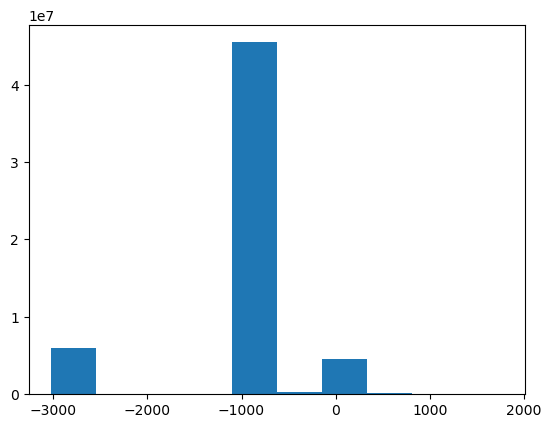

In [21]:
plt.hist(ct_images_vol_data.flatten())

In [19]:
np.min(ct_images_vol_data), np.max(ct_images_vol_data)

(-3024.0, 1769.0)

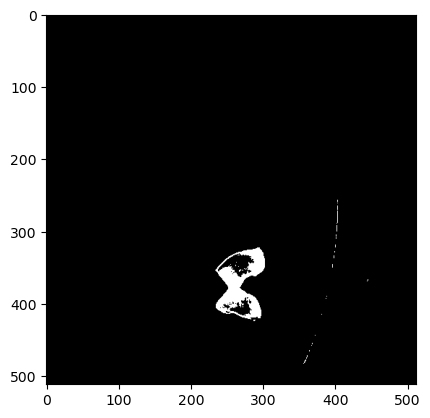

In [47]:
bone_mask = ct_images_vol_data > 300  # try different thresholds

# Visualize result
plt.imshow(bone_mask[:, :, 108], cmap='gray')

In [54]:
interact(view_slice, z=(0, ct_images_vol_data.shape[2] - 1), vol_data = fixed(bone_mask))

interactive(children=(IntSlider(value=107, description='z', max=215), Output()), _dom_classes=('widget-interac…

<function __main__.view_slice(z, vol_data)>

In [ ]:
interact(view_saggital_slice, y=(0, ct_images_vol_data.shape[1] - 1), vol_data = fixed(bone_mask))

interactive(children=(IntSlider(value=255, description='y', max=511), Output()), _dom_classes=('widget-interac…

<function __main__.view_saggital_slice(y, vol_data)>

In [ ]:
interact(view_coronal_slice, x=(0, ct_images_vol_data.shape[0] - 1), vol_data = fixed(bone_mask))

interactive(children=(IntSlider(value=255, description='x', max=511), Output()), _dom_classes=('widget-interac…

<function __main__.view_coronal_slice(x, vol_data)>